# Lab | Model generation, and validation

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Get the data


We are using the marketing_customer_analysis.csv file.

In [3]:
data = pd.read_csv("C:\\users\\simra\\Downloads\\Ironhack\\Week_2\\Day_2\\marketing_customer_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Linear regression

## Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity (see the previous lab)

In [4]:
numericals =data._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

C:\Users\simra\AppData\Local\Temp\ipykernel_9724\1940378060.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                

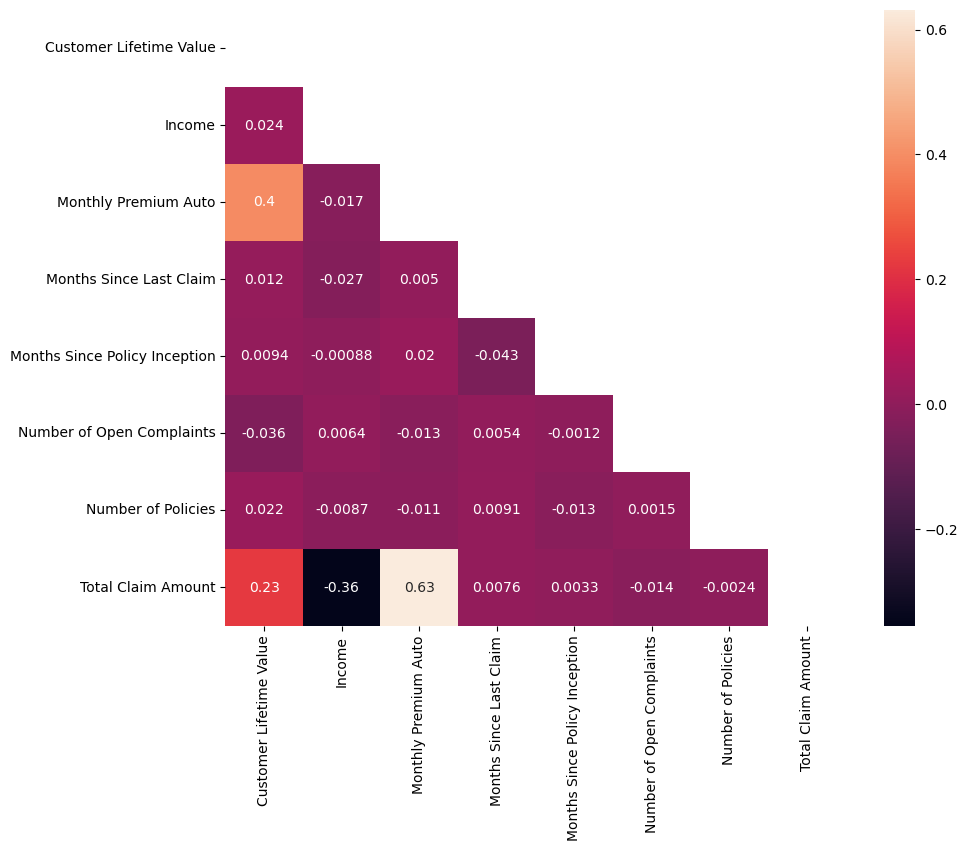

In [8]:
# Check multicollinearity.
correlations = numericals.corr()
print(correlations)

mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals.corr(), mask=mask, annot=True)
plt.show()

In [11]:
# upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# upper_tri 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,NaN,0.024366,0.396262,0.011517,0.009418,0.036343,0.021955,0.226451
Income,NaN,NaN,0.016665,0.026715,0.000875,0.006408,0.008656,0.355254
Monthly Premium Auto,NaN,NaN,NaN,0.005026,0.020257,0.013122,0.011233,0.632017
Months Since Last Claim,NaN,NaN,NaN,NaN,0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,NaN,NaN,NaN,NaN,NaN,0.001158,0.013333,0.003335
Number of Open Complaints,NaN,NaN,NaN,NaN,NaN,NaN,0.001498,0.014241
Number of Policies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002354
Total Claim Amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove outliers

In [13]:
#There is no pair of features that have a high correlation, so we do not drop any features.

In [9]:
data.shape

(9134, 24)

## X-y split. (define which column you want to predict, and which ones you will use to make the prediction)

In [27]:
#separate the features from the labels
X = data[['Income', 'Monthly Premium Auto','Number of Policies']]
y = data['Total Claim Amount']

In [28]:
X.head()


,Income,Monthly Premium Auto,Number of Policies
0,56274,69,1
1,0,94,8
2,48767,108,2
3,0,106,7
4,43836,73,1


In [29]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

## Use the Train-test split to create the Train, and Test sets (make sure to set the random_state option to any integer number of your choice).

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the columns= option to set the columns names to X.columns).

In [14]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes().

In [31]:
#categorical features and numerical ones are going to be treated differently
numerical = X_train.select_dtypes(include=np.number)
categorical = X_train.select_dtypes(include=object)

In [32]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,7307.0,37517.762556,30192.253906,0.0,0.0,33806.0,61796.0,99981.0
Monthly Premium Auto,7307.0,93.562748,34.679436,61.0,68.0,83.0,109.0,298.0
Number of Policies,7307.0,2.988230,2.400925,1.0,1.0,2.0,4.0,9.0


In [50]:
#categorical.describe().T

#There are no categorical columns

## If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .fit() only in the Train set 

In [34]:
# Example for scaling numerical columns using StandardScaler
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical)
scaled_categorical = categorical  # No transformation needed for categorical columns

# Apply transformations to X_test as well
scaled_numerical_test = scaler.transform(X_test.select_dtypes(include=np.number))
scaled_categorical_test = X_test.select_dtypes(include=object)

## Save all your transformers/scalers right after the .fit() using pickle using the code shown below:

In [37]:
import os

path = ("C:\\users\\simra\\Downloads\\Ironhack\\Week_2\\Day_2\\transformers")
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "scaled_numerical_test.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(scaled_numerical_test, file) # Replace "variable" with the name of the variable that contains your transformer

## If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays generated by the train_test_split() function.

In [43]:
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical.columns)
scaled_categorical_df = pd.DataFrame(scaled_categorical, columns=categorical.columns)

scaled_numerical_test_df = pd.DataFrame(scaled_numerical_test, columns=numerical.columns)
scaled_categorical_test_df = pd.DataFrame(scaled_categorical_test, columns=categorical.columns)

## Transform the categorical columns into numbers using a:

1. OneHotEncoder for categorical nominal columns. (again only use the .fit() in the Train set, but the .transform() in the Train and the Test sets)

2. Remember to save all your transformers/scalers right after the .fit() using pickle using the code shown below:
path = "encoders/"

In [38]:
#There are no categorical columns

## Concat numerical_transformer and categorical_transfomed DataFrames using pd.concat().

In [39]:
#There are no categorical columns


## Apply another MinMaxScaler to the concatenated DataFrame.

In [48]:
#There was no Concatebated data Frame
results_df = scaled_numerical_test_df

# Model Validation


Compute the following metrics for your Train and Test sets:

R2.
MSE.
RMSE
MAE.

In [49]:
import pickle
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler = MinMaxScaler()

scaler.fit(X_train_df) # fit() Determine the min and the max of each column in the TRAIN set

path = "./"
scaler_file_name = "min_max_scaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_df) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler.transform(X_test_df) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_num.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_num.columns)

X_train_scaled_df.head()

NameError: name 'X_train_df' is not defined

Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.

In [ ]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))